# Effect on Sales through TV, Radio and Newspaper Advertisements

As a data analyst, my objective is to analyze the impact of different advertising channels—TV, radio, and newspaper—on the company's overall sales performance. The dataset contains information on the amount spent on each advertising medium and the corresponding sales figures.

#### Key Goals:
`Determine the Most Effective Advertising Channel`: By evaluating the influence of TV, radio, and newspaper on sales, we will identify which medium contributes the most to increasing sales. This analysis will be crucial for optimizing the company's advertising strategy.

`Identify the Least Effective Channel`: Based on the analysis, we will also identify which advertising source yields the least impact on sales. This could provide insights into where advertising expenditures can be reduced or removed to improve the cost-effectiveness of the marketing strategy.

1. To compare every predictor variable with sales (one variable at a time)
2. to compare all the predictors with variable with sales (multi variable regression)

hence, following are the final variables:

1. Target Variable (Sales)
2. Predictors
   1. (int) TV: Budget of advertisements on TV
   2. (int) Radio: Budget of advertisements on radio
   3. (int) Newspaper: Budget of advertisement on newspaper

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

## about the pre proccessing and model building part

we use scikit learn library to do data pre processing and building models. 

1. Data Preprocessing
   1. `train_test_split`: a function used to divide whole data into training and test data. here, model is trained on 80% of the dataset, and then it is tested on rest of the 20% dataset.

   2. `PolynomialFeatures`: If we have a predictor x, then this function helps in generating x^2, x^3, etc, so that model can catch any non linear relationship between predictor and target variable.

2. Building model
   1. `LinearRegression`: a simple linear relationship model which assums that there is linear relationship between predictor and target variable. it also minimizes squared residuals (predicted output- observed output).
   2. `Lasso`: A type of linear regression model with L1 regularization (Least Absolute Shrinkage and Selection Operator). Lasso adds a penalty equal to the absolute value of the coefficients to reduce overfitting and can shrink some coefficients to zero, effectively performing feature selection.
   3. `Ridge`: A linear regression model with L2 regularization. Ridge regression adds a penalty equal to the square of the coefficients. It helps prevent overfitting by shrinking the coefficients but does not necessarily make any of them zero.
   4. `make_pipeline`: This function allows you to create a machine learning pipeline. A pipeline is a way to streamline the preprocessing and modeling steps. For example, you can combine `PolynomialFeatures` and `LinearRegression` into a single pipeline, so you don't have to manually apply each step during the training process. The pipeline executes the steps in order, ensuring consistent application during training and testing.


3. Validation of model
   1. `r2_score`: This calculates the R-squared (coefficient of determination), which measures how well the model explains the variance in the target variable. The value ranges from 0 to 1, where 1 indicates that the model perfectly explains the variance, and 0 means it does not explain the variance at all. Negative values imply that the model is worse than a simple average model.
   2. `MAE`: This calculates the average of the absolute differences between predicted and actual values. Lower values indicate better model performance.
      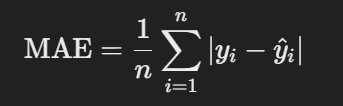
   3. `MSE`:  This calculates the average of the squared differences between predicted and actual values. Squaring the errors penalizes larger errors more, making MSE sensitive to outliers. The lower the MSE, the better the model’s performance.
      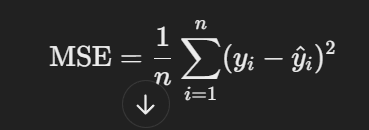
   4. `cross_val_score`: This function is used for performing cross-validation, which is a technique to evaluate model performance in a more robust way than just using a single train/test split. It divides the dataset into k-folds, trains the model on k-1 folds, and tests it on the remaining fold. This process is repeated k times, and the results are averaged to provide a more reliable estimate of the model’s performance.

In [113]:
#for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [115]:
#for building the model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

In [117]:
#for validation of the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [119]:
## Loading data

df=pd.read_csv("advertising.csv")
print(df)

     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


In [121]:
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [123]:
df.tail(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [125]:
df.shape

(200, 5)

In [127]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [129]:
df.notnull().sum()

Unnamed: 0    200
TV            200
Radio         200
Newspaper     200
Sales         200
dtype: int64

In [131]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [133]:
#summary of statistical data 
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Exploratory data analysis

In [136]:
#correlations of features
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


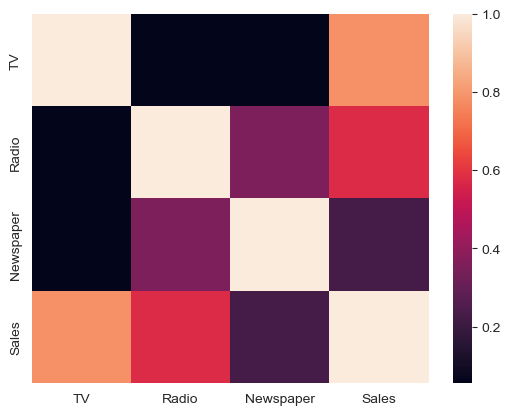

In [138]:
#visualization of correlations
sns.heatmap(df.corr())
plt.show()

#as correlations are mirror images, we can mask the upper half triangle

<Axes: >

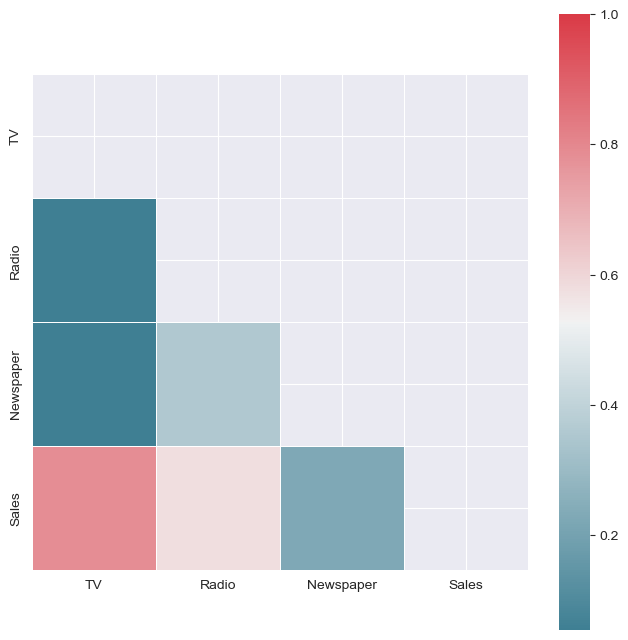

In [139]:
# generating mask for upper half of the triangle
mask = np.zeros_like(df.corr(), dtype=bool)  #creates matrix of zeroes. this is used to mask.
mask[np.triu_indices_from(mask)] = True      #apply mask to upper triangle by setting upper triangle to True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8)) #(width, height)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) # palette "diverges" from one color to another, easier to differentiate +ve and -ve correlations.

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, square=True, linewidths=.5, ax=ax)


In [141]:
#High correlation between TV and sales is observed.

## Visualizing the relationship of variables with output (sales) using scatterplots

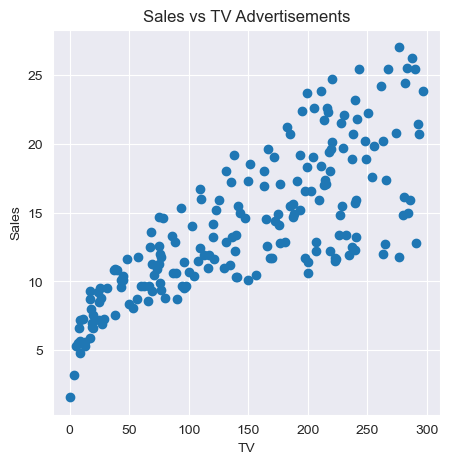

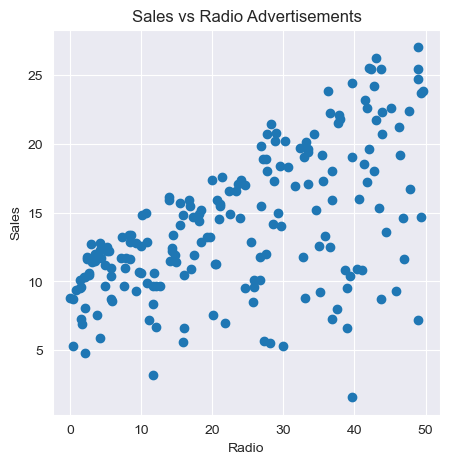

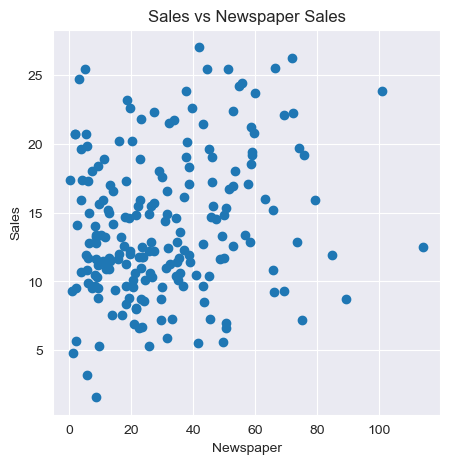

In [150]:
### Visualize the relationship using scatterplot

f, ax = plt.subplots(figsize=(5, 5))
plt.scatter(df["TV"], df["Sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Sales vs TV Advertisements")

f, ax = plt.subplots(figsize=(5, 5))
plt.scatter(df["Radio"], df["Sales"])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Sales vs Radio Advertisements")

f, ax = plt.subplots(figsize=(5, 5))
plt.scatter(df["Newspaper"], df["Sales"])
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Sales vs Newspaper Sales")

plt.show()

Among all three, linear relationship between TV advertisements and Sales is more observed.

## Visualizing the inter-relationship of variables using scatterplots

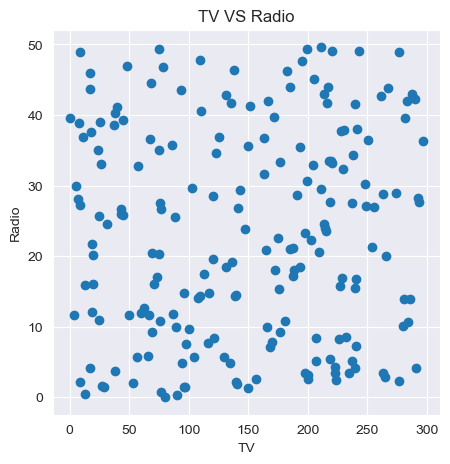

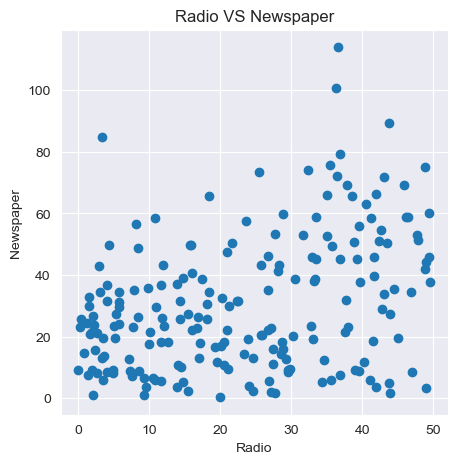

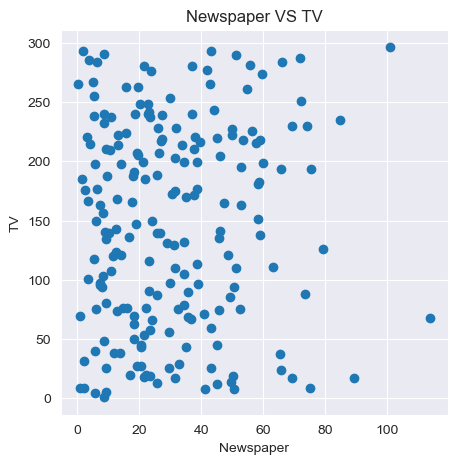

In [152]:
### Visualize the relationship using scatterplot

f, ax = plt.subplots(figsize=(5, 5))
plt.scatter(df["TV"], df["Radio"])
plt.xlabel("TV")
plt.ylabel("Radio")
plt.title("TV VS Radio")

f, ax = plt.subplots(figsize=(5, 5))
plt.scatter(df["Radio"], df["Newspaper"])
plt.xlabel("Radio")
plt.ylabel("Newspaper")
plt.title("Radio VS Newspaper")

f, ax = plt.subplots(figsize=(5, 5))
plt.scatter(df["Newspaper"], df["TV"])
plt.xlabel("Newspaper")
plt.ylabel("TV")
plt.title("Newspaper VS TV")

plt.show()

Hence we dont see a clear relationship among the predictors, hence we can say the predictors might be independent of each other.

## Prepare data of modelling

In [162]:
# separating target output from the predictors. 
# deleting sales from the dataset and keeping it separate as target output.

x=df.drop(["Sales"],axis=1)
y=df["Sales"]

# displaying predictor and output information
print("==(x): (predictors)==")
print(f"Size: {x.shape}")
print(x.head())

print("\n==(y): (target)==")
print(f"Size: {y.shape}")
print(y.head())


==(x): (predictors)==
Size: (200, 3)
      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

==(y): (target)==
Size: (200,)
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


In [270]:
### Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1) # random_state to ensure the split is reproducible and we get the same split every time we run the code

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (160, 3)
y_train size: (160,)

x_test size: (40, 3)
y_test size: (40,)


In [272]:
### Initialize dataframe that will store the results
df_results = pd.DataFrame(columns = ["Predictor/s", "R2", "MAE", "MSE", "RMSE", "Cross-Val Mean"])

# Build then evaluate the model

## Linear regression

In [276]:
### Function for Linear Regression with default values
def linreg_model(xtrain, xtest):
    ### Initialize algorithm
    linreg = LinearRegression()

    ### Fit the data
    linreg.fit(xtrain, y_train)
    
    ### Evaluate the model
    y_pred = linreg.predict(xtest)
    
    print("R2:", r2_score(y_pred, y_test))
    print("MAE:", mean_absolute_error(y_pred, y_test))
    print("MSE:", mean_squared_error(y_pred, y_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))
    
    f, ax = plt.subplots(figsize=(5, 5))
    plt.scatter(y_pred, y_test)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Actual vs Predicted Outputs")
    
    return {"R2": r2_score(y_pred, y_test) * 100, "MAE": mean_absolute_error(y_pred, y_test), 
            "MSE": mean_squared_error(y_pred, y_test), "RMSE": np.sqrt(mean_squared_error(y_pred, y_test))}

### Using all predictors

The results of this model that uses all of the predictor variable will be our basis on the next models.

R2: 0.8832957189120244
MAE: 1.0402154012924716
MSE: 1.99188555182879
RMSE: 1.4113417558581585
Cross-Val Results: [0.87302696 0.8581613  0.92968723 0.89013272 0.93146498 0.93138735
 0.7597901  0.91217097 0.83891753 0.92882311]
Cross-Val Mean: 0.8853562237979615


C:\Users\vishn\AppData\Local\Temp\ipykernel_17600\788581076.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, linreg_all_results_df], ignore_index=True)


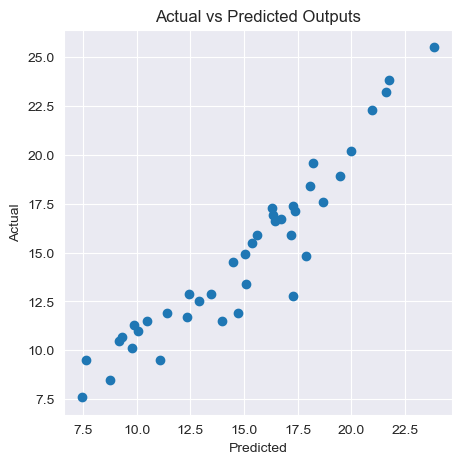

In [279]:
### Predict and get results
linreg_all_results = linreg_model(x_train, x_test)

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x, y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_all_results.update({"Predictor/s":"All", "Cross-Val Mean": cv_score.mean() * 100})

# Convert the dictionary to a DataFrame before concatenation
linreg_all_results_df = pd.DataFrame([linreg_all_results])

# Concatenate the two DataFrames
df_results = pd.concat([df_results, linreg_all_results_df], ignore_index=True)


#### Using only TV as predictor

Since TV shows more correlation and linearity with our target variable, let's try predicting Sales using only this variable

R2: 0.21291424370160794
MAE: 2.4659827815717357
MSE: 10.859345325608267
RMSE: 3.2953520791575923
Cross-Val Results: [0.70015158 0.43449405 0.58322591 0.78975123 0.47952235 0.62298657
 0.66525353 0.60389703 0.16530872 0.64237498]
Cross-Val Mean: 0.5686965937483904


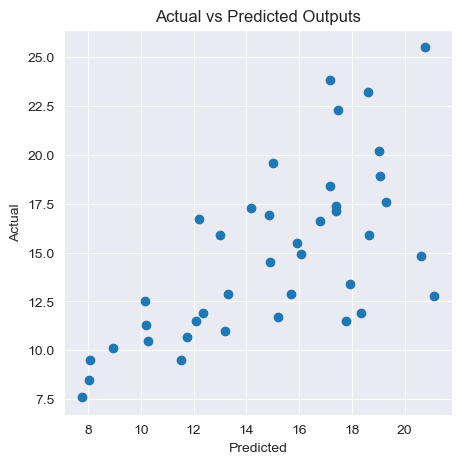

In [294]:
### Predict and get results
linreg_TV_results = linreg_model(x_train["TV"].values.reshape(-1,1), x_test["TV"].values.reshape(-1,1))

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x["TV"].values.reshape(-1, 1), y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_TV_results.update({"Predictor/s":"TV", "Cross-Val Mean": cv_score.mean() * 100})

# Converting to DataFrame from Dictionary
linreg_TV_results_df = pd.DataFrame([linreg_TV_results])
### Add the results to the dataframe
df_results = pd.concat([df_results, linreg_TV_results_df], ignore_index=True)

Although TV has the highest correlation with sales, this model (alone TV) does not perform well compared to the model that uses all predictors.

#### Using TV and Radio
The top 2 predictor variables based on the EDA above are TV and Radio, so let's see if the combination of these variables makes a better model.

R2: 0.885920874810955
MAE: 1.0209003282677902
MSE: 1.955221885011317
RMSE: 1.3982924890777741
Cross-Val Results: [0.87936561 0.85860496 0.92960574 0.89040105 0.93302554 0.93129743
 0.76486772 0.91373255 0.83925519 0.92951475]
Cross-Val Mean: 0.8869670516810129


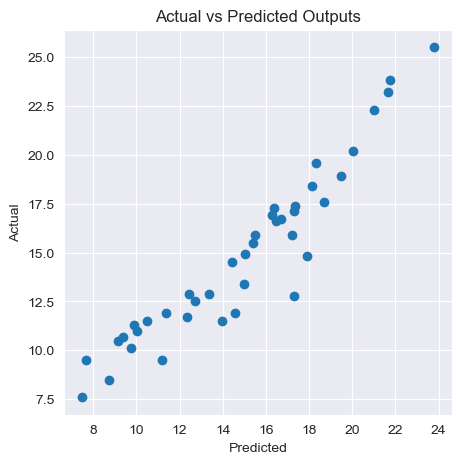

In [296]:
### Predict and get results
linreg_TV_Radio_results = linreg_model(x_train[["TV","Radio"]],x_test[["TV","Radio"]])

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x[["TV","Radio"]], y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_TV_Radio_results.update({"Predictor/s":"TV and Radio", "Cross-Val Mean": cv_score.mean() * 100})

# Converting to DataFrame from Dictionary
linreg_TV_Radio_results_df = pd.DataFrame([linreg_TV_Radio_results])

### Add the results to the dataframe
df_results = pd.concat([df_results, linreg_TV_Radio_results_df], ignore_index=True)

This model is slighly better than the model used before (alone TV)

In [299]:
# Conclusion

df_results.set_index("Predictor/s", inplace = True)
df_results.head()

,R2,MAE,MSE,RMSE,Cross-Val Mean
Predictor/s,,,,,
All,88.329572,1.040215,1.991886,1.411342,88.535622
TV,21.291424,2.465983,10.859345,3.295352,56.869659
TV,21.291424,2.465983,10.859345,3.295352,56.869659
TV,21.291424,2.465983,10.859345,3.295352,56.869659
TV and Radio,88.592087,1.020900,1.955222,1.398292,88.696705


The Linear Regression model that uses the predictors TV and Radio performs the best out of all the models tried.

These results mean that advertising on TV and Radio contribute the most in Sales, and Newspaper advertisements have little effect in Sales.

Based on these findings, it is recommended that the marketer or the business owner shall allocate more budget on TV and Radio advertisements rather than Newspaper.